In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import pathlib
import os

from helper_functions import *
metadata = pd.read_csv("metadata.csv")
metadata_cfdna = metadata[metadata["Sample type"].isin(["cfDNA", "Control"])]
import warnings
warnings.filterwarnings("ignore")

topK = 500
atlas_sample_types = "Tissue,WBC"

datadir = "./datadir"
outputdir = "./outputdir_02102023"
# outputdir = "outputdir_23102023_hypo_hyper"

path_to_03_output = os.path.join(outputdir, "03_output_noFDR")
path_to_04_output = os.path.join(outputdir, "04_output_noFDR", "top{}_{}".format(topK, atlas_sample_types.replace(",", "_and_")))
path_to_05_output = os.path.join(outputdir, "05_output_noFDR", "top{}_{}".format(topK, atlas_sample_types.replace(",", "_and_")))
os.system("mkdir -p {}".format(path_to_05_output))

atlas = pd.read_csv(os.path.join(path_to_03_output, "top{}_atlas_{}.final.csv".format(topK, atlas_sample_types)), index_col =[0])

atlas = atlas[[item for item in atlas.columns if "_y" not in item ]]
atlas.columns = [item.replace("_x", "") for item in atlas.columns]

avg_atlas = atlas.set_index("sample").fillna(0).groupby("label").mean()
avg_atlas = avg_atlas.loc[atlas_labels[atlas_sample_types]]
atlas_regions = [item for item in atlas.columns if item not in ["sample", "label"]]

dfcfdna = pd.read_csv(os.path.join(path_to_04_output, "top{}_atlas_{}.all_cfDNA_betadf.csv".format(topK, atlas_sample_types.replace(",", "_and_"))), index_col = [0])
dfcontrol = pd.read_csv(os.path.join(path_to_04_output, "top{}_atlas_{}.all_Control_betadf.csv".format(topK, atlas_sample_types.replace(",", "_and_"))), index_col = [0])

deconvo_res_cfdna = deconvo(dfcfdna, avg_atlas, atlas_sample_types)
deconvo_res_control = deconvo(dfcontrol, avg_atlas, atlas_sample_types)

deconvo_res_cfdna.to_csv(os.path.join(path_to_05_output, "deconvo_res_cfdna.csv"))
deconvo_res_control.to_csv(os.path.join(path_to_05_output, "deconvo_res_control.csv"))

avg_atlas.to_csv(os.path.join(path_to_05_output, "final_atlas.csv"))

In [2]:
path_to_data_rplot = "/datassd/hieunguyen/ECD/tumor_atlas_official/data_for_Rplot"
avg_atlas.to_csv(os.path.join(path_to_data_rplot, "Figure1_atlas_heatmap.final.csv"))

In [6]:
deconvo_res_cfdna = deconvo_res_cfdna.set_index("TOO").T.reset_index()
deconvo_res_cfdna

TOO,index,Liver,Breast,Gastric,Lung,CRC,WBC
0,NB34I1W,0.045858,0.000000,0.088385,0.000000,0.000000,0.865756
1,NB34I2W,0.022112,0.000000,0.055797,0.011398,0.000000,0.910694
2,NB34I3W,0.041466,0.096276,0.059234,0.007661,0.012902,0.782460
3,NB34I4W,0.000000,0.314404,0.091547,0.037184,0.000000,0.556866
4,35-ZNB12R3ME131W_M525-M725,0.049058,0.000000,0.076227,0.000000,0.000000,0.874716
5,36-ZNB22ME131W_M526-M726,0.050329,0.000000,0.041005,0.000000,0.000000,0.908666
6,37-ZNB27R3ME131W_M527-M727,0.037411,0.021712,0.060288,0.000700,0.000000,0.879889
7,4-ZMH059R2ME131W_M509-M709,0.339071,0.000000,0.058070,0.022413,0.000000,0.580446
8,5-ZNL09R2ME131W_M510-M710,0.056794,0.000000,0.056357,0.050715,0.000000,0.836135
9,4-ZMC061ME131W_M507-M707,0.218892,0.000000,0.105757,0.072450,0.010896,0.592005


In [7]:
deconvo_res_cfdna["prediction"] = deconvo_res_cfdna[["Liver", "Breast", "Gastric", "Lung", "CRC"]].apply(
    lambda x: ["Liver", "Breast", "Gastric", "Lung", "CRC"][list(x).index(max(x))], axis = 1
)

In [8]:
deconvo_res_cfdna.head()

TOO,index,Liver,Breast,Gastric,Lung,CRC,WBC,prediction
0,NB34I1W,0.045858,0.000000,0.088385,0.000000,0.000000,0.865756,Gastric
1,NB34I2W,0.022112,0.000000,0.055797,0.011398,0.000000,0.910694,Gastric
2,NB34I3W,0.041466,0.096276,0.059234,0.007661,0.012902,0.782460,Breast
3,NB34I4W,0.000000,0.314404,0.091547,0.037184,0.000000,0.556866,Breast
4,35-ZNB12R3ME131W_M525-M725,0.049058,0.000000,0.076227,0.000000,0.000000,0.874716,Gastric


In [9]:
deconvo_res_cfdna.to_csv(os.path.join(path_to_data_rplot, "figure4_full_gs_cfdna_deconvo.csv"))

<Axes: ylabel='label'>

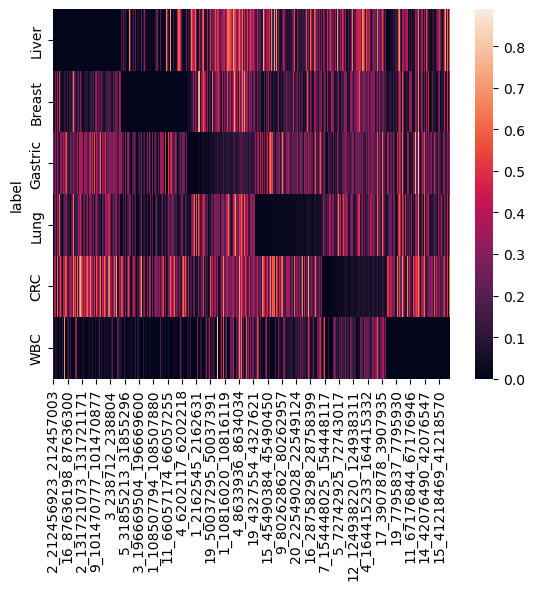

In [4]:
sns.heatmap(avg_atlas)